### Importing dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import cv2

### Loading sample and plotting in time domain

Duration of clip:  3.8285714285714287


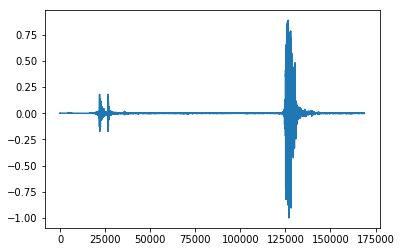

In [2]:
x,sr = librosa.load('car+door.wav', sr=44100)
print("Duration of clip: ",librosa.get_duration(y=x, sr=sr))
plt.plot(x)

### Silence trimming + Clipping to constant length + Padding

Duration of clip:  5.0


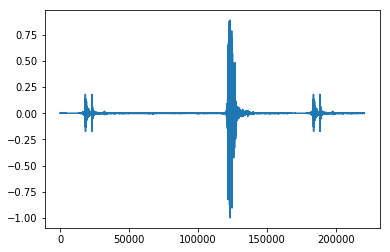

In [3]:
sampling_rate = 44100
duration = 5
samples = sampling_rate * duration

x, _ = librosa.effects.trim(x)
if len(x) > samples: 
    x = x[0:0+samples]
else: 
    x = np.pad(x, (0, samples - len(x)), 'wrap')
        
print("Duration of clip: ",librosa.get_duration(y=x, sr=sr))
plt.plot(x)

### Plotting mel spectrogram

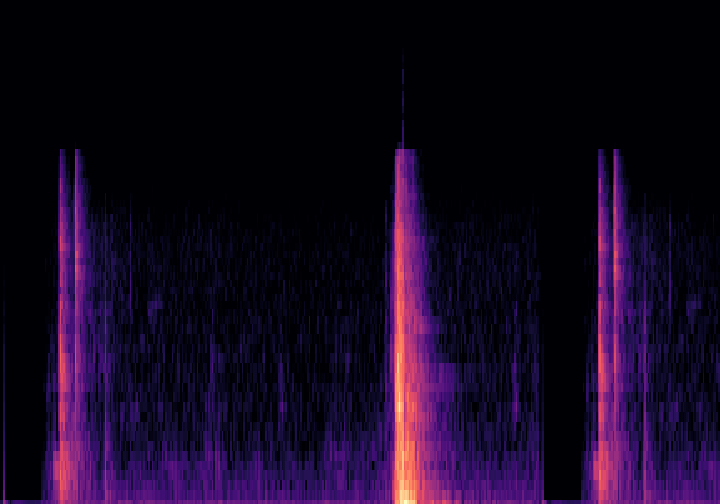

In [4]:
import matplotlib as mpl

def full_frame(width=None, height=None):
    mpl.rcParams['savefig.pad_inches'] = 0
    figsize = None if width is None else (width, height)
    fig = plt.figure(figsize=figsize)
    ax = plt.axes([0,0,1,1], frameon=False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.autoscale(tight=True)

top_db = 60
fmin = 20
fmax =  sampling_rate // 2
n_mels = 64
n_fft = 1024
hop_length = 512

spectrogram = librosa.feature.melspectrogram(x,
                                            sr=sampling_rate,
                                            n_mels=n_mels,
                                            hop_length=hop_length,
                                            n_fft=n_fft,
                                            fmin=fmin,
                                            fmax=fmax)
logmel = librosa.power_to_db(spectrogram, ref=np.max)
full_frame(10, 7)
librosa.display.specshow(logmel, sr=sampling_rate, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.savefig('./test.png')

### Resizing image for model input

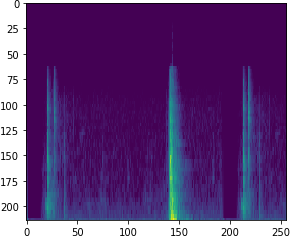

In [5]:
image = cv2.imread('test.png')
image = cv2.resize(image, (256,214))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
plt.show()